#Bagging & Boosting KNN & Stacking- Assignment


Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer- Fundamental idea:
Ensembles combine multiple models (learners) to produce a single, usually more accurate and robust prediction than any single constituent model. Diversity among learners and a way to combine them (voting, averaging, weighted sum, meta-learner) are the keys. Ensembles reduce variance, bias, or both (depending on method), improve stability, and can exploit complementary strengths of different models.

Bagging vs Boosting (approach & objective):

Bagging (Bootstrap Aggregating)

Approach: Train many base learners independently on different bootstrap samples (random samples with replacement) of the training data. Combine predictions by majority vote (classification) or average (regression).

Objective: Reduce variance — make an unstable learner (e.g., decision tree) less sensitive to data noise. Each model is trained equally (no sequential dependence).

Example: Random Forest.

Boosting

Approach: Train base learners sequentially, where each new learner focuses more on the mistakes of the previous learners (by reweighting samples or using residuals). Combine learners by weighted sum.

Objective: Reduce bias (and sometimes variance) — build a strong learner from many weak learners by focusing on hard examples.

Example: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

Short contrast: Bagging = parallel, equal-weighted, variance reduction. Boosting = sequential, reweighted, bias reduction (and model refinement).

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Answer: Why a single tree overfits:
A full-grown decision tree can fit training noise and produce high variance — different training samples yield very different trees.

How Random Forest reduces overfitting:

Bootstrap sampling: Each tree is trained on a different random sample of the training data (with replacement). This introduces diversity among trees.

Random feature subset for splits: At each tree split, only a random subset of features is considered (not all). This decorrelates trees (so they don’t all pick the same strong predictors), improving variance reduction when averaging.

Two key hyperparameters and their roles:

n_estimators (number of trees): More trees generally reduce variance and stabilize predictions; beyond some point returns diminish. Larger n_estimators improves generalization but increases compute.

max_features (number of features to consider at each split): Lower max_features increases tree diversity and reduces correlation between trees, reducing overfitting; but too small may increase bias. Typical choices: sqrt(n_features) for classification, n_features/3 for regression.

Other helpful hyperparameters: max_depth (limits complexity of each tree) and min_samples_leaf (prevents tiny leaves).

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer:Stacking (stacked generalization):
Stacking trains multiple base (level-0) models (can be heterogeneous: trees, SVMs, neural nets...) and then trains a meta-learner (level-1) on the base models’ predictions to learn how to combine them. Usually base models are trained with cross-validated predictions to avoid leaking label information to the meta-learner.

Difference from bagging/boosting:

Bagging: many similar models trained in parallel, combined with simple averaging/voting. No meta-learner.

Boosting: sequential learners where later learners correct earlier errors; combination is typically additive/weighted.

Stacking: parallel/hybrid, uses a learned meta-model to combine predictions — more flexible, can learn complex combination rules and exploit heterogeneity.

Simple example use case:
For a tabular classification problem, use RandomForest, GradientBoosting, and LogisticRegression as base learners; train a simple LogisticRegression as meta-learner on the out-of-fold predictions of the base models to improve overall accuracy.


Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer:OOB (Out-Of-Bag) Score:
For each tree, about 1/3 of the training samples are not included in that tree’s bootstrap sample — these are the tree’s out-of-bag samples. OOB predictions for each training sample are obtained by aggregating predictions from the subset of trees where that sample was OOB. The OOB score is the accuracy (or other metric) computed from those aggregated OOB predictions.

Why useful & how it avoids a separate validation set:
OOB provides an internal estimate of generalization performance using the training set itself; it acts like cross-validation without needing to set aside a validation partition. This is convenient when data is limited; OOB estimates are unbiased for Random Forests and often match cross-validation estimates reasonably well.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
Answer: How they handle errors from weak learners:

AdaBoost: Focuses on misclassified samples by increasing their weights; subsequent weak learners are trained on the reweighted dataset, concentrating on previously misclassified points.

Gradient Boosting: Fits subsequent learners to the residuals (negative gradient of the loss) of the ensemble so far; each new learner tries to correct the overall model’s remaining errors in a gradient-descent-like manner.

Weight adjustment mechanism:

AdaBoost: Maintains a distribution of sample weights; after each weak learner, weights of misclassified samples are increased multiplicatively, and learners are combined with weights proportional to their performance (e.g., log( (1-error)/error )).

Gradient Boosting: No explicit sample weight distribution (though variants exist); compute residuals (gradients) of loss and fit learner to residuals; combined models use a learning rate (shrinkage) to scale new learners' contribution.

Typical use cases:

AdaBoost: Works well with simple base learners (stumps) and clean datasets; easy to implement and interpretable. Sensitive to noisy labels/outliers.

Gradient Boosting: More flexible (custom loss functions), state-of-the-art for many tabular tasks (e.g., XGBoost, LightGBM, CatBoost). Handles complex patterns, supports regularization and shrinkage.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:
CatBoost has built-in categorical feature handling via ordered target statistics (a form of target encoding done in an order-preserving manner to avoid target leakage) and combinations of categorical features. It transforms categorical values into numerical representations using statistical encodings computed with permutations/ordering so that the encoding for a row doesn’t use that row’s own target (prevents target leakage).

It also uses other tricks (like CTR — count/target rate features) and gradient boosting optimization tuned to categorical distributions.

Result: Minimal need for one-hot encoding or heavy manual preprocessing; CatBoost typically gives strong performance out-of-the-box on datasets with many categorical variables.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [2]:
# Q7_knn_wine.py
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
data = load_wine()
X, y = data.data, data.target

# 2. Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 3. KNN default (K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("=== Unscaled KNN (K=5) Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Classification report:\n", classification_report(y_test, y_pred_default))

# 4. Apply StandardScaler, retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("=== Scaled KNN (K=5) Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification report:\n", classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for best K and metric (Euclidean/Manhattan)
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['minkowski', 'manhattan'],
    # For minkowski, p=2 => Euclidean; for manhattan the classifier will use 'manhattan' explicitly
    # We'll set p=2 for minkowski (Euclidean)
}
# We'll wrap a small custom estimator to set p based on metric if needed:
from sklearn.base import clone

def make_knn(metric):
    if metric == 'minkowski':
        return KNeighborsClassifier(p=2)
    else:
        return KNeighborsClassifier(metric='manhattan')

# Simpler: use GridSearch on two different estimator types via a pipeline-like loop:
best_params = None
best_score = -1
best_estimator = None

for metric in ['minkowski', 'manhattan']:
    knn = KNeighborsClassifier(metric=metric, p=2 if metric=='minkowski' else 1)
    gs = GridSearchCV(knn, {'n_neighbors': list(range(1,21))}, cv=5, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train_scaled, y_train)  # use scaled features for GridSearch
    if gs.best_score_ > best_score:
        best_score = gs.best_score_
        best_params = {'metric': metric, 'n_neighbors': gs.best_params_['n_neighbors']}
        best_estimator = gs.best_estimator_

print("=== GridSearchCV Best ===")
print(best_params, "CV accuracy:", best_score)

# 6. Train optimized KNN and compare
best_estimator.fit(X_train_scaled, y_train)
y_pred_best = best_estimator.predict(X_test_scaled)
print("=== Optimized KNN on Scaled Data Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification report:\n", classification_report(y_test, y_pred_best))


=== Unscaled KNN (K=5) Metrics ===
Accuracy: 0.7222222222222222
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

=== Scaled KNN (K=5) Metrics ===
Accuracy: 0.9444444444444444
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

=== GridSearchCV Best ===
{'metric': 'minkowski', 'n_neighbors':

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


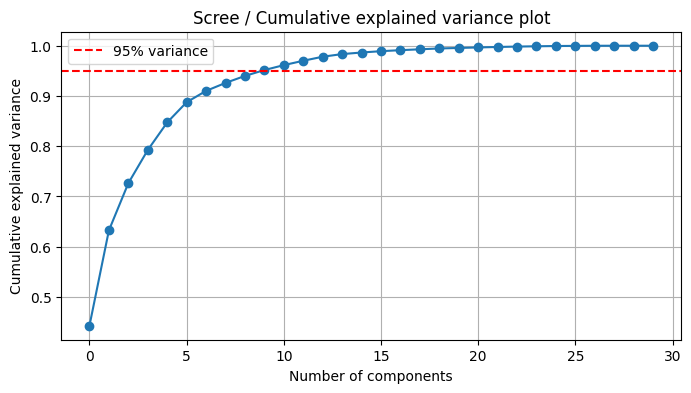

Original features: 30 -> PCA features to retain 95%: 10
Accuracy (original data): 0.9707602339181286
Accuracy (PCA 95% variance): 0.9473684210526315


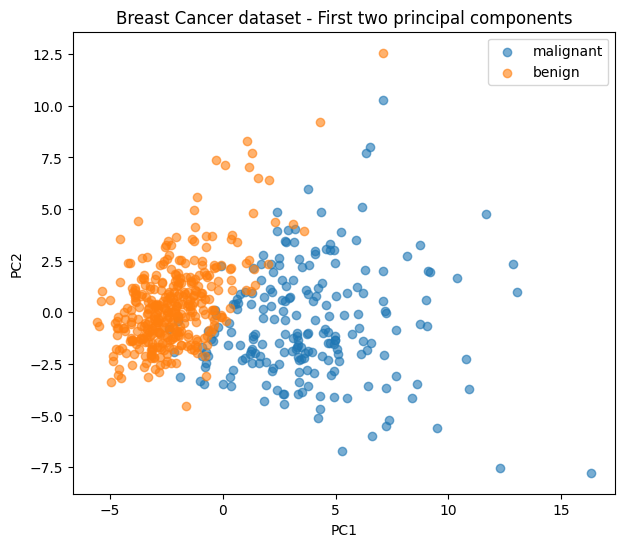

In [3]:
# Q8_pca_knn.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and scree plot
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.title('Scree / Cumulative explained variance plot')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()

# 3. Retain 95% variance
pca95 = PCA(n_components=0.95, random_state=42)
X_pca95 = pca95.fit_transform(X_scaled)
print("Original features:", X.shape[1], "-> PCA features to retain 95%:", X_pca95.shape[1])

# 4. Train KNN on original and PCA data
X_train_o, X_test_o, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_p, X_test_p, _, _ = train_test_split(X_pca95, y, test_size=0.3, random_state=42, stratify=y)

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_o, y_train)
y_pred_orig = knn_orig.predict(X_test_o)
acc_orig = accuracy_score(y_test, y_pred_orig)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_p, y_train)
y_pred_pca = knn_pca.predict(X_test_p)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy (original data):", acc_orig)
print("Accuracy (PCA 95% variance):", acc_pca)

# 5. Visualize first two principal components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
plt.figure(figsize=(7,6))
for class_label in np.unique(y):
    plt.scatter(X_pca2[y==class_label,0], X_pca2[y==class_label,1], label=data.target_names[class_label], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Breast Cancer dataset - First two principal components")
plt.legend()
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


MSE Euclidean (K=5): 4803.90558674207
MSE Manhattan (K=5): 5210.225816542467


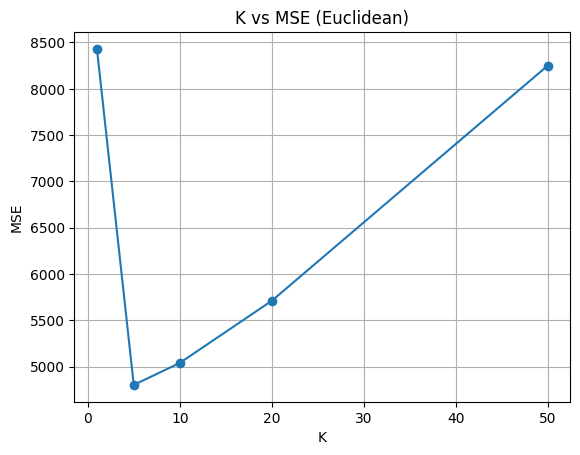

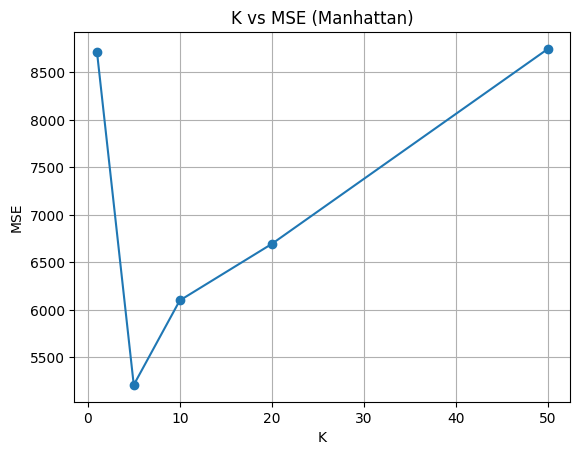

K=1: MSE Euclidean=8430.4212, MSE Manhattan=8719.0469
K=5: MSE Euclidean=4803.9056, MSE Manhattan=5210.2258
K=10: MSE Euclidean=5041.1077, MSE Manhattan=6099.5563
K=20: MSE Euclidean=5712.0191, MSE Manhattan=6694.7024
K=50: MSE Euclidean=8251.3713, MSE Manhattan=8747.8427


In [4]:
# Q9_knn_regressor.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. K=5 Euclidean and Manhattan
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

knn_euc.fit(X_train, y_train)
knn_man.fit(X_train, y_train)

y_pred_euc = knn_euc.predict(X_test)
y_pred_man = knn_man.predict(X_test)

mse_euc = mean_squared_error(y_test, y_pred_euc)
mse_man = mean_squared_error(y_test, y_pred_man)

print("MSE Euclidean (K=5):", mse_euc)
print("MSE Manhattan (K=5):", mse_man)

# 3. Test K = 1,5,10,20,50 and plot K vs MSE
Ks = [1,5,10,20,50]
mse_values = []
for K in Ks:
    knn = KNeighborsRegressor(n_neighbors=K, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(Ks, mse_values, marker='o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('K vs MSE (Euclidean)')
plt.grid(True)
plt.show()

# Also plot Manhattan for same Ks for comparison
mse_values_man = []
for K in Ks:
    knn = KNeighborsRegressor(n_neighbors=K, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values_man.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(Ks, mse_values_man, marker='o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('K vs MSE (Manhattan)')
plt.grid(True)
plt.show()

# Print results side-by-side
for i, K in enumerate(Ks):
    print(f"K={K}: MSE Euclidean={mse_values[i]:.4f}, MSE Manhattan={mse_values_man[i]:.4f}")


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Algorithm: brute — Training time 0.0013s, Accuracy 0.7446
Algorithm: kd_tree — Training time 0.0017s, Accuracy 0.7446
Algorithm: ball_tree — Training time 0.0018s, Accuracy 0.7446
Best algorithm by accuracy: brute
Feature importances:
 Glucose                     0.232530
Insulin                     0.

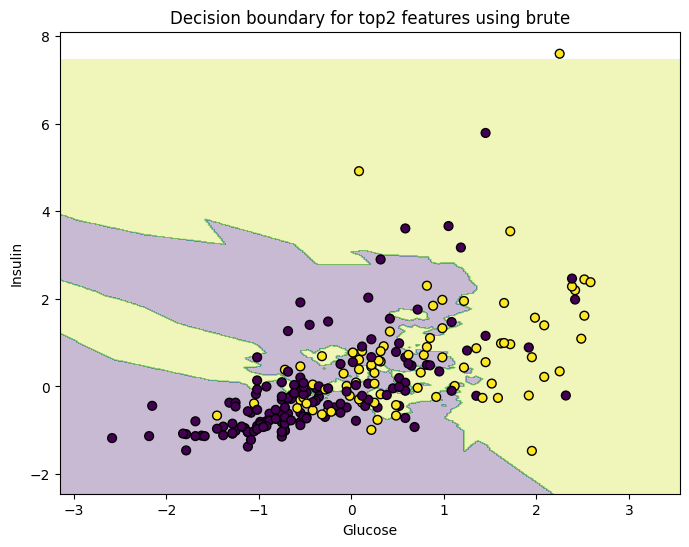

In [5]:
# Q10_knn_imputer_trees.py
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load Pima Indians Diabetes dataset (provided URL)
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

# Inspect columns
print(df.head())
# The original Pima dataset uses zeros for some features as missing (like Glucose, BloodPressure).
# We'll treat zeros in specific columns as missing if appropriate.
missing_columns_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in missing_columns_zero:
    df[col] = df[col].replace(0, np.nan)

# 2. KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X = df.drop('Outcome', axis=1)
y = df['Outcome'].values

X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN with brute, kd_tree, ball_tree and compare training time & accuracy
results = {}
for algo in ['brute', 'kd_tree', 'ball_tree']:
    clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    t0 = time.time()
    clf.fit(X_train_scaled, y_train)
    t1 = time.time()
    train_time = t1 - t0
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'time': train_time, 'accuracy': acc}
    print(f"Algorithm: {algo} — Training time {train_time:.4f}s, Accuracy {acc:.4f}")

# 5. Plot decision boundary for the best-performing method (select two features)
best_algo = max(results, key=lambda k: results[k]['accuracy'])
print("Best algorithm by accuracy:", best_algo)

# Choose two most important features using RandomForest (on imputed data)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature importances:\n", feat_imp)

top2 = feat_imp.index[:2].tolist()
print("Top 2 features:", top2)

# Build decision boundary using only top2 features
X2 = X_imputed[top2].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

best_clf = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_clf.fit(X2_train_scaled, y2_train)

# Define grid for plotting
h = 0.02
x_min, x_max = X2_train_scaled[:,0].min() - 1, X2_train_scaled[:,0].max() + 1
y_min, y_max = X2_train_scaled[:,1].min() - 1, X2_train_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = best_clf.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_test_scaled[:,0], X2_test_scaled[:,1], c=y2_test, edgecolor='k', s=40)
plt.xlabel(top2[0])
plt.ylabel(top2[1])
plt.title(f"Decision boundary for top2 features using {best_algo}")
plt.show()
